<a href="https://colab.research.google.com/github/eimantasd/Artificial-Intelligent/blob/main/lab4v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Importuojame TensorFlow Keras RNN modeliavimui (jei reikia)
# Kadangi RNN reikalauja specifinio duomenų formato ir yra sudėtingesnis,
# aš jį įtrauksiu, bet pažymėsiu, kad jo pritaikymas lenteliniams duomenims
# dažnai nėra optimaliausias pasirinkimas ir reikalauja kruopštaus paruošimo.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Nustatymai geresniam grafikų atvaizdavimui
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

In [ ]:
# Duomenų įkėlimas
try:
    # Jei dirbate lokaliai, nurodykite kelią iki failo
    df_original = pd.read_csv('realtor-data.csv')
except FileNotFoundError:
    print("Klaida: realtor-data.csv nerastas. Prašome įkelti failą į darbinį aplanką.")
    # Alternatyviai, galima bandyti atsisiųsti tiesiogiai, bet tai reikalautų Kaggle API arba rankinio atsisiuntimo.
    # Šiam pavyzdžiui, darome prielaidą, kad failas yra lokaliai.
    exit()


print("Pradiniai duomenys (pirmos 5 eilutės):")
print(df_original.head())
print("\nDuomenų rinkinio informacija:")
df_original.info()
print("\nDuomenų rinkinio statistika:")
print(df_original.describe(include='all'))

Pradiniai duomenys (pirmos 5 eilutės):
   brokered_by    status     price  bed  bath  acre_lot     street  \
0     103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1      52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2     103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3      31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
4      34632.0  for_sale   65000.0  6.0   2.0      0.05   331151.0   

         city        state  zip_code  house_size prev_sold_date  
0    Adjuntas  Puerto Rico     601.0       920.0            NaN  
1    Adjuntas  Puerto Rico     601.0      1527.0            NaN  
2  Juana Diaz  Puerto Rico     795.0       748.0            NaN  
3       Ponce  Puerto Rico     731.0      1800.0            NaN  
4    Mayaguez  Puerto Rico     680.0         NaN            NaN  

Duomenų rinkinio informacija:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412812 entries, 0 to 412811
Data columns (total 12 columns):
 #


Pradinis eilučių skaičius: 412812

Trūkstamos reikšmės prieš apdorojimą:
brokered_by          619
status                 0
price                415
bed               107415
bath              111963
acre_lot           74443
street              1447
city                  74
state                  1
zip_code              77
house_size        150181
prev_sold_date    213873
dtype: int64


<ipython-input-4-7520e1ff7bd1>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-4-7520e1ff7bd1>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 


Eilučių skaičius po NaN šalinimo iš 'price' ir imputacijos: 412397

Trūkstamos reikšmės po apdorojimo:
brokered_by     619
price             0
bed               0
bath              0
acre_lot          0
street         1446
city              0
state             0
zip_code          0
house_size        0
dtype: int64

Eilučių skaičius po dublikatų pašalinimo: 412138

Kategoriniai požymiai, kurie bus koduojami (jei liko): ['state']
Skaitiniai požymiai: ['bed', 'bath', 'acre_lot', 'house_size']

Duomenų išsidėstymo vizualizacija (histogramos):


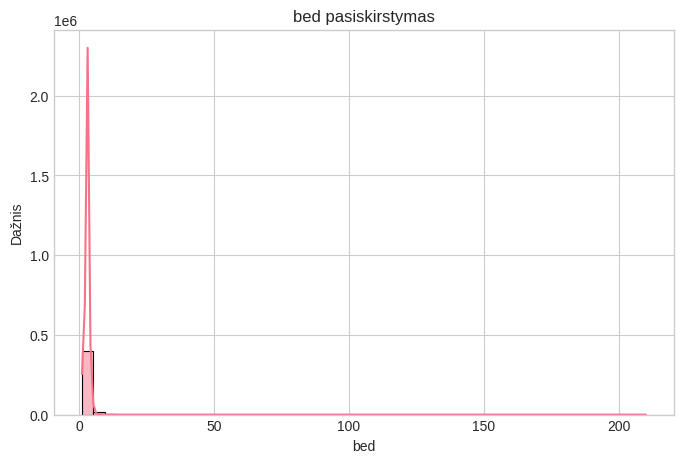

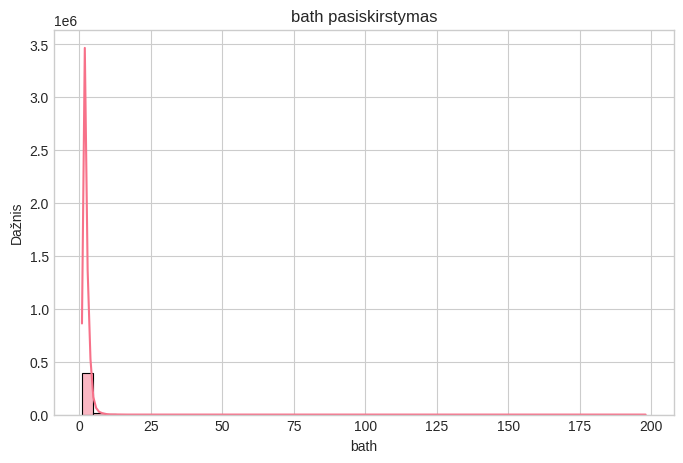

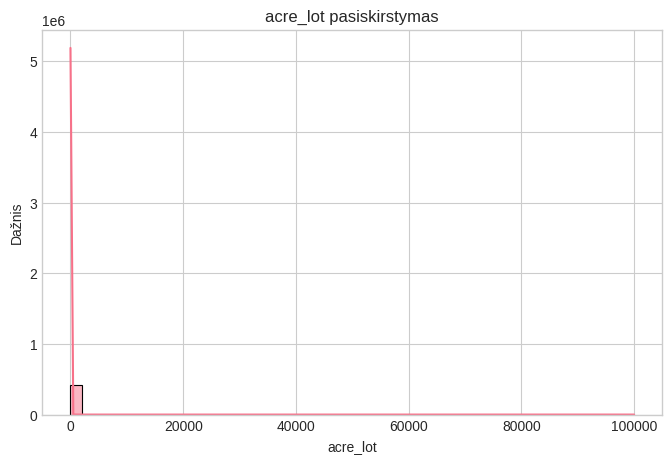

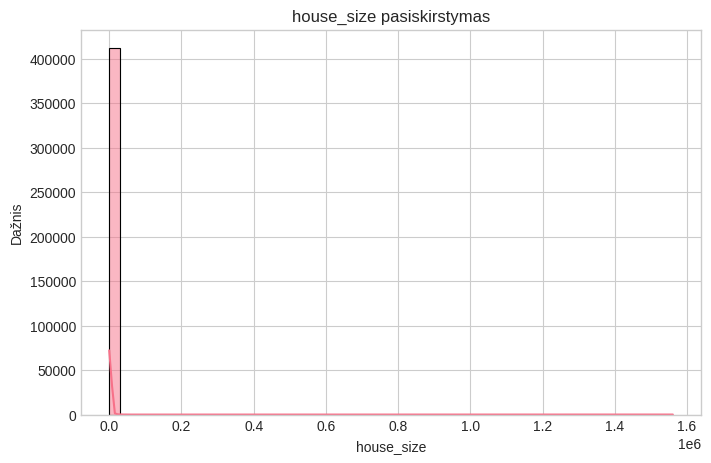

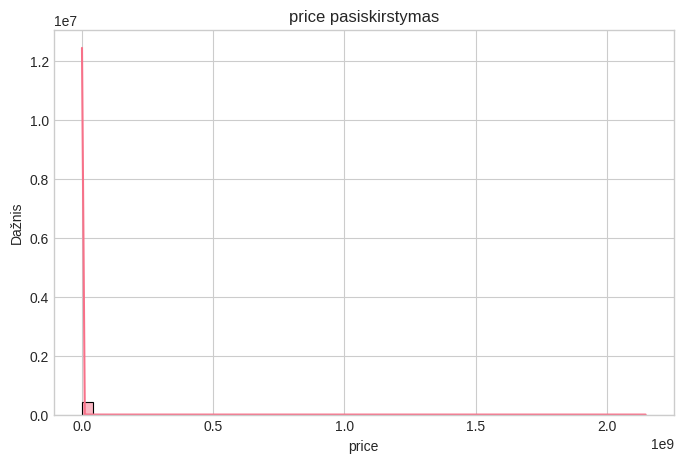


Anomalijų šalinimas...
Pašalinta 32583 eilučių dėl anomalijų stulpelyje 'bed'.
Pašalinta 12707 eilučių dėl anomalijų stulpelyje 'bath'.
Pašalinta 57458 eilučių dėl anomalijų stulpelyje 'acre_lot'.
Pašalinta 31227 eilučių dėl anomalijų stulpelyje 'house_size'.
Pašalinta 16454 eilučių dėl anomalijų stulpelyje 'price'.

Eilučių skaičius po anomalijų pašalinimo: 261709

Duomenų išsidėstymo vizualizacija po anomalijų šalinimo (histogramos):


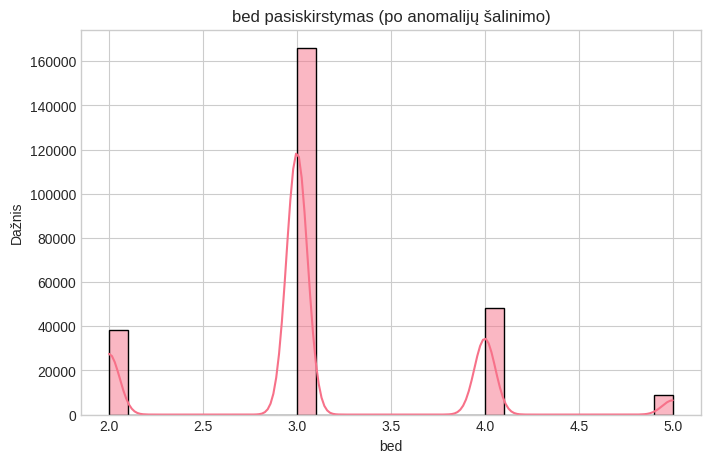

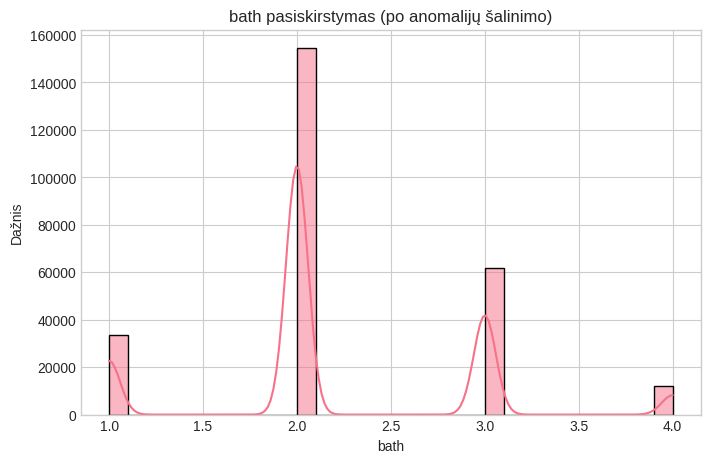

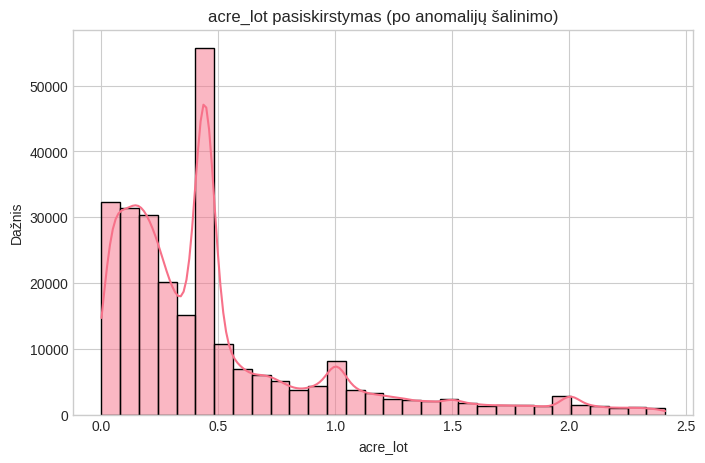

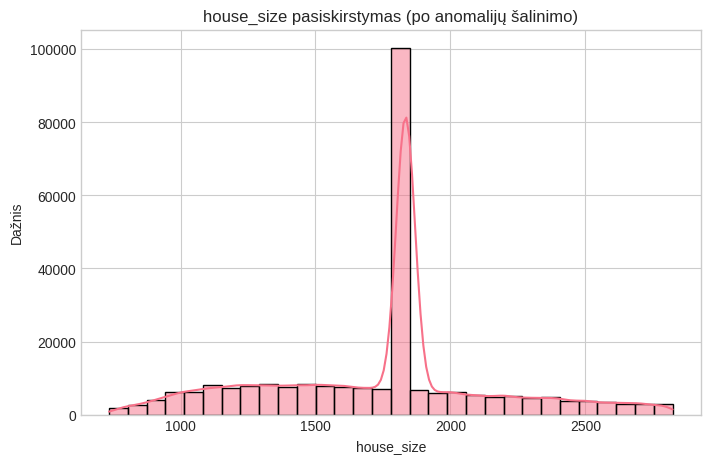

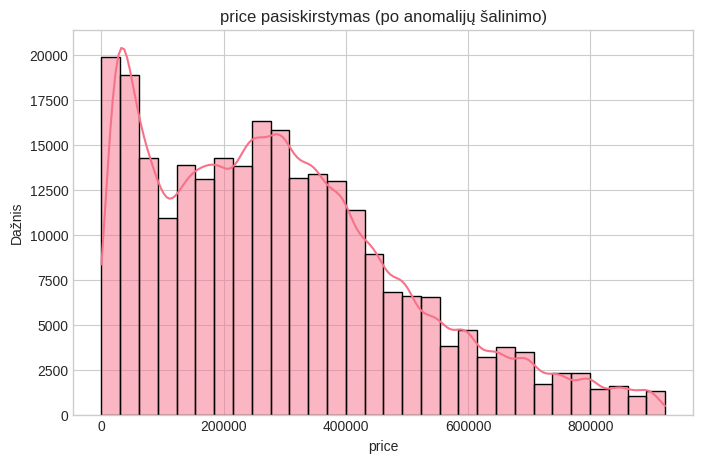

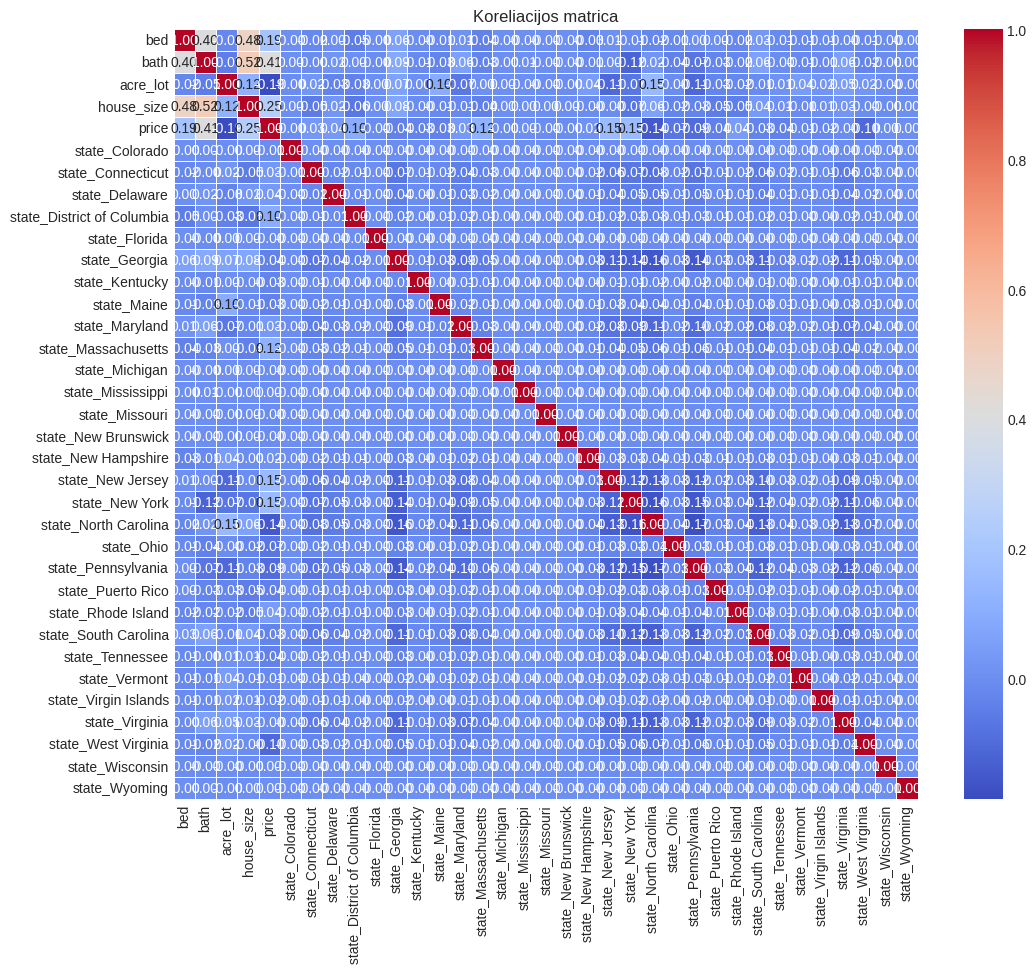


Koreliacijos matrica (reikšmės):
price                         1.000000
bath                          0.410092
house_size                    0.247680
bed                           0.191371
state_New Jersey              0.154503
state_New York                0.153919
state_Massachusetts           0.116940
state_District of Columbia    0.098210
state_Rhode Island            0.043803
state_Delaware                0.036069
state_Maryland                0.034791
state_Connecticut             0.031184
state_New Hampshire           0.017526
state_Wyoming                 0.002297
state_Wisconsin               0.001839
state_Mississippi             0.001422
state_Missouri               -0.001448
state_Michigan               -0.001713
state_Colorado               -0.002038
state_Florida                -0.002064
state_New Brunswick          -0.002751
state_Virginia               -0.003213
state_Vermont                -0.012432
state_Virgin Islands         -0.017607
state_South Carolina         -

In [ ]:
# Sukuriame darbinę duomenų kopiją
df = df_original.copy()

# 2.1. Nustatykite ir pašalinkite netinkamus duomenis.
print(f"\nPradinis eilučių skaičius: {len(df)}")

# Tikriname trūkstamas reikšmes
print("\nTrūkstamos reikšmės prieš apdorojimą:")
print(df.isnull().sum())

# Pašaliname stulpelius su didele trūkstamų reikšmių dalimi arba mažai informatyvius
# 'prev_sold_date' turi daug trūkstamų ir datos apdorojimas yra sudėtingas, todėl šaliname
# 'status' gali būti vienodas visur, jei tai tik parduodamų objektų sąrašas.
# 'street_address' yra per daug detalus, jei turime miestą/valstiją/zip.
cols_to_drop = ['prev_sold_date', 'status', 'street_address']
# Patikriname, ar tokie stulpeliai egzistuoja prieš šalinant
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
df.drop(columns=existing_cols_to_drop, inplace=True)


# Imputuojame skaitines reikšmes mediana (mažiau jautri išskirtims nei vidurkis)
# 'acre_lot', 'house_size', 'zip_code' gali turėti trūkstamų reikšmių
numerical_cols_with_nan = ['acre_lot', 'house_size', 'zip_code', 'bed', 'bath'] # Įtraukiam 'bed', 'bath' jei kartais turėtų NaN
for col in numerical_cols_with_nan:
    if col in df.columns: # Tikriname ar stulpelis egzistuoja
        if df[col].isnull().any():
            df[col].fillna(df[col].median(), inplace=True)

# Kategoriniams stulpeliams ('city', 'state'), jei yra trūkstamų, galime užpildyti moda arba specialia kategorija 'Unknown'
# Šiame rinkinyje 'city' ir 'state' neturėtų turėti daug NaN, bet patikrinkime
categorical_cols_with_nan = ['city', 'state']
for col in categorical_cols_with_nan:
    if col in df.columns:
        if df[col].isnull().any():
            df[col].fillna(df[col].mode()[0], inplace=True) # Užpildome moda

# Pašaliname eilutes, kuriose tikslinis kintamasis ('price') yra NaN
df.dropna(subset=['price'], inplace=True)

print(f"\nEilučių skaičius po NaN šalinimo iš 'price' ir imputacijos: {len(df)}")
print("\nTrūkstamos reikšmės po apdorojimo:")
print(df.isnull().sum())

# Patikriname ir pašaliname dublikatus
df.drop_duplicates(inplace=True)
print(f"\nEilučių skaičius po dublikatų pašalinimo: {len(df)}")

# 2.2. Užkoduokite kategorinius kintamuosius.
# 'city' turi labai daug unikalių reikšmių, todėl OneHotEncoding sukurtų per daug stulpelių.
# Galima būtų naudoti Target Encoding arba dažnumo kodavimą, arba tiesiog praleisti 'city'.
# Dėl paprastumo šiame etape praleisime 'city' ir naudosime 'state' ir 'zip_code' (kurį paversime į 'object' tipą).
# 'zip_code' kartais traktuojamas kaip skaitinis, bet dažniau kaip kategorinis.
# Jei 'zip_code' unikalių reikšmių per daug, jį taip pat reikėtų apdoroti atsargiau.

if 'zip_code' in df.columns:
    df['zip_code'] = df['zip_code'].astype(str) # Paverčiame į string, kad būtų traktuojamas kaip kategorija

# Identifikuojame kategorinius ir skaitinius stulpelius
categorical_features = ['state'] # 'zip_code' ir 'city' praleidžiame dėl didelio unikalių reikšmių skaičiaus
numerical_features = ['bed', 'bath', 'acre_lot', 'house_size']

# Tikriname, ar stulpeliai egzistuoja
categorical_features = [col for col in categorical_features if col in df.columns]
numerical_features = [col for col in numerical_features if col in df.columns]

# Pašaliname 'city' ir 'zip_code' iš pagrindinio df, nes juos apdorosime atskirai arba praleisime
# Šiame pavyzdyje 'city' praleidžiame, 'zip_code' praleidžiame, nes jo kategorijų skaičius bus per didelis
# df.drop(columns=['city', 'zip_code'], inplace=True, errors='ignore')

# Kadangi zip_code ir city gali būti labai naudingi, bet jų kardinalumas didelis,
# vienas iš būdų yra naudoti tik dažniausiai pasitaikančias kategorijas
# Arba, paprastumo dėlei, šį kartą juos praleisime ir naudosime tik 'state'
# Jei norėtume naudoti 'zip_code' ar 'city', reiktų sudėtingesnio apdorojimo (pvz., Target Encoding, dažnumo ribojimas)
# Dėl didelio 'city' ir 'zip_code' kardinalumo, praleidžiame juos iš one-hot encoding
# jei norėtume juos naudoti, reiktų taikyti pvz. dažnumo ribojimą arba target encoding.
# Šiame pavyzdyje naudosime tik 'state' kaip kategorinį požymį.
df_processed = df[numerical_features + categorical_features + ['price']].copy()


print("\nKategoriniai požymiai, kurie bus koduojami (jei liko):", categorical_features)
print("Skaitiniai požymiai:", numerical_features)

# 2.3. Požymių mastelio keitimas (normalizuokite arba standartizuokite skaitinius požymius).
# Tai bus atlikta vėliau naudojant Pipeline, po duomenų padalijimo į mokymo ir testavimo rinkinius.

# 2.4. Vizualiai pavaizduokite ir ištirkite duomenų išsidėstymą.
print("\nDuomenų išsidėstymo vizualizacija (histogramos):")
for col in numerical_features + ['price']:
    if col in df_processed.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df_processed[col], kde=True, bins=50)
        plt.title(f'{col} pasiskirstymas')
        plt.xlabel(col)
        plt.ylabel('Dažnis')
        plt.show()

# 2.5. Pašalinkite anomalijas "outliers".
# Naudosime IQR metodą skaitiniams požymiams ir kainai.
print("\nAnomalijų šalinimas...")
for col in numerical_features + ['price']:
    if col in df_processed.columns:
        Q1 = df_processed[col].quantile(0.25)
        Q3 = df_processed[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        initial_rows = len(df_processed)
        df_processed = df_processed[(df_processed[col] >= lower_bound) & (df_processed[col] <= upper_bound)]
        removed_rows = initial_rows - len(df_processed)
        if removed_rows > 0:
            print(f"Pašalinta {removed_rows} eilučių dėl anomalijų stulpelyje '{col}'.")

print(f"\nEilučių skaičius po anomalijų pašalinimo: {len(df_processed)}")

# Tikriname, ar po anomalijų šalinimo liko pakankamai duomenų
if len(df_processed) < 100: # Arbitrary threshold
    print("DĖMESIO: Po anomalijų šalinimo liko labai mažai duomenų. Tai gali paveikti modelio kokybę.")
    print("Apsvarstykite galimybę sušvelninti anomalijų šalinimo kriterijus arba naudoti daugiau pradinių duomenų.")
    # Jei reikia, galite praleisti anomalijų šalinimą arba naudoti mažesnį daugiklį nei 1.5

# Pakartotinė vizualizacija po anomalijų šalinimo
print("\nDuomenų išsidėstymo vizualizacija po anomalijų šalinimo (histogramos):")
for col in numerical_features + ['price']:
    if col in df_processed.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df_processed[col], kde=True, bins=30)
        plt.title(f'{col} pasiskirstymas (po anomalijų šalinimo)')
        plt.xlabel(col)
        plt.ylabel('Dažnis')
        plt.show()


# 2.6. Pavaizduokite koreliacijos matricą ir nustatykite ar yra vienas nuo kito priklausančių kintamųjų.
# Kodėl tai svarbu ir kokią įtaką tai gali daryti rezultatams/metodo pasirinkimui?

# Laikinai atliekame one-hot encoding tik koreliacijos matricai, jei yra kategorinių požymių
# Kadangi koreliacijos matrica veikia tik su skaitiniais duomenimis.
temp_df_for_corr = df_processed.copy()
if categorical_features:
    temp_df_for_corr = pd.get_dummies(temp_df_for_corr, columns=categorical_features, drop_first=True)

plt.figure(figsize=(12, 10))
correlation_matrix = temp_df_for_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Koreliacijos matrica')
plt.show()

print("\nKoreliacijos matrica (reikšmės):")
print(correlation_matrix['price'].sort_values(ascending=False))

Mokymo rinkinio dydis: 209367, Testavimo rinkinio dydis: 52342

Mokomas Tiesinės Regresijos modelis...

--- Tiesinė Regresija ---
MAE: 131920.04
MSE: 28568722656.11
R2: 0.3353


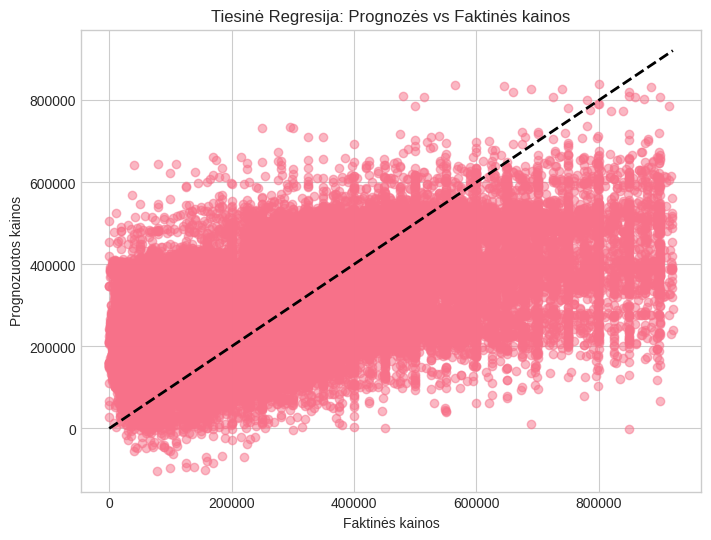

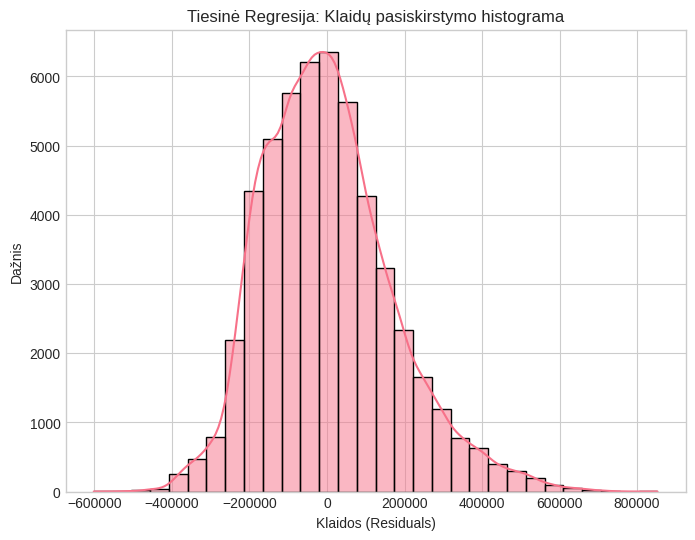

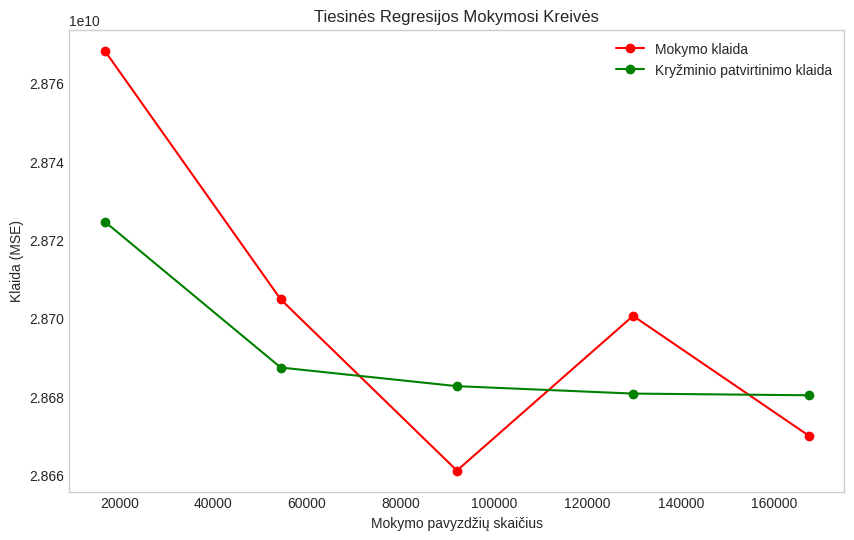


Mokomas Polinominės Regresijos modelis...

--- Polinominė Regresija (laipsnis 2) ---
MAE: 125793.77
MSE: 26403975173.06
R2: 0.3857


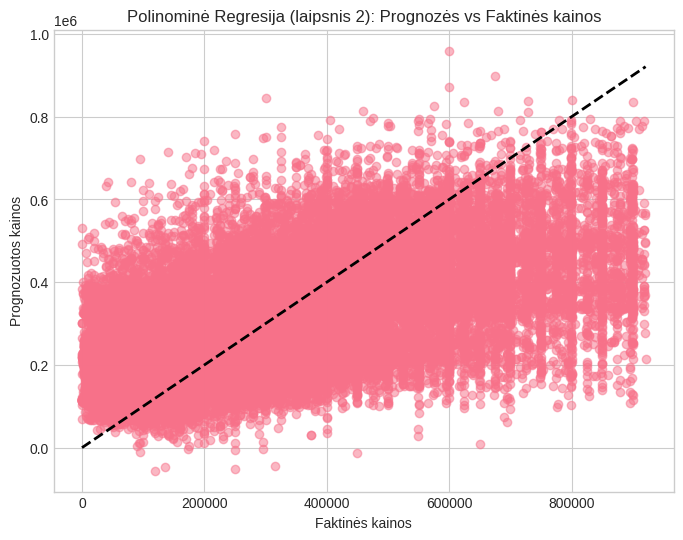

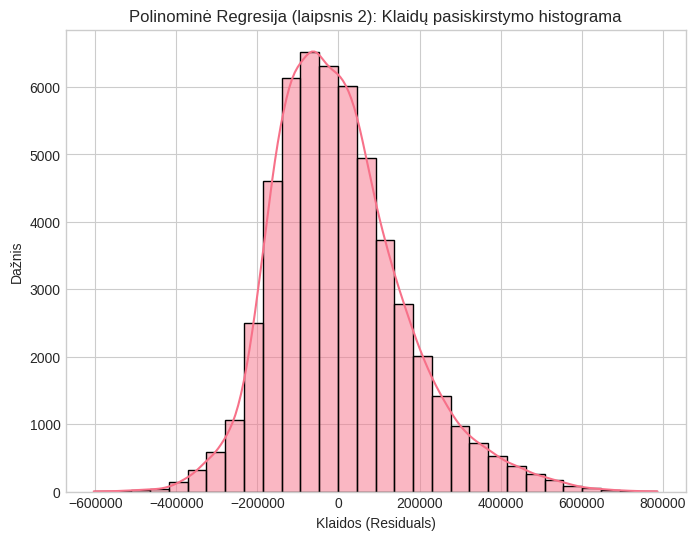

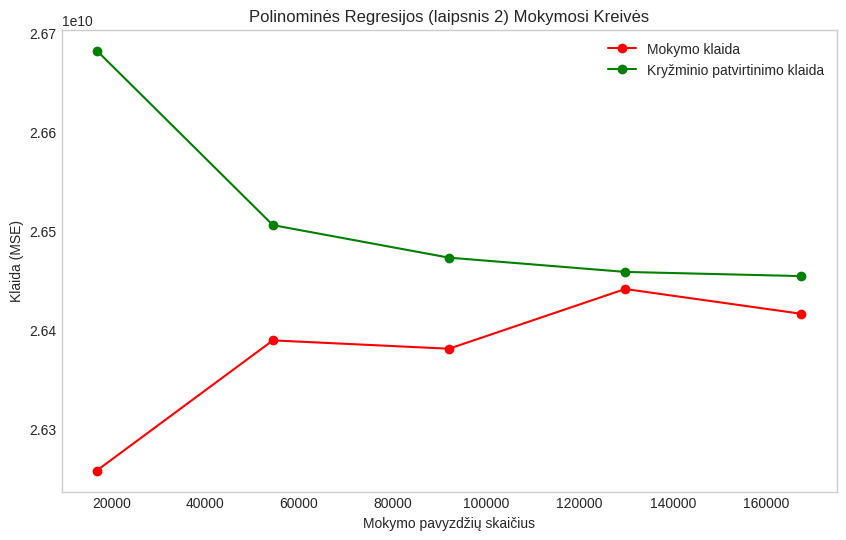


Mokomas Sprendimų Medžio Regresorius...

--- Sprendimų Medis ---
MAE: 107555.61
MSE: 21591644157.11
R2: 0.4976


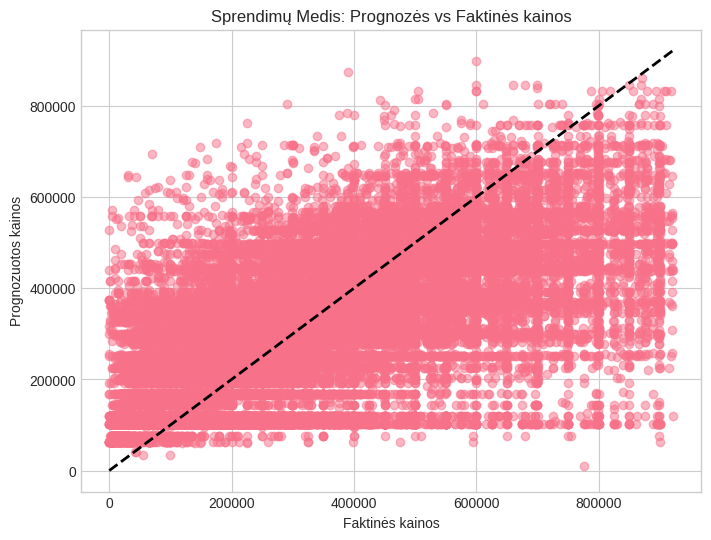

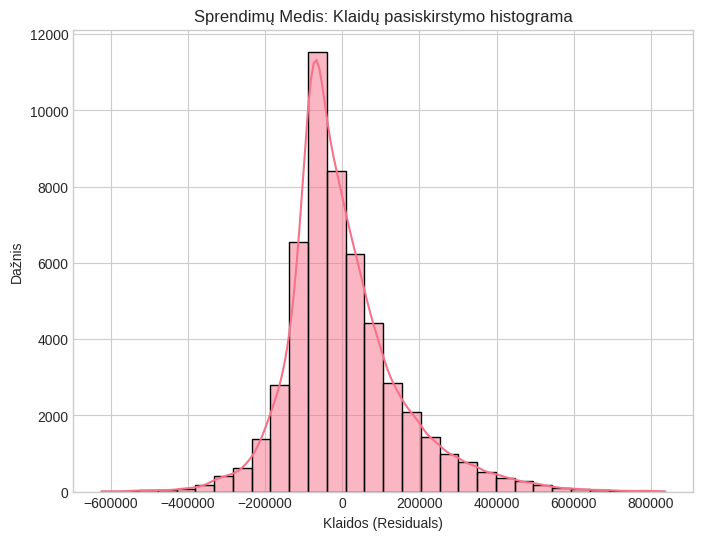

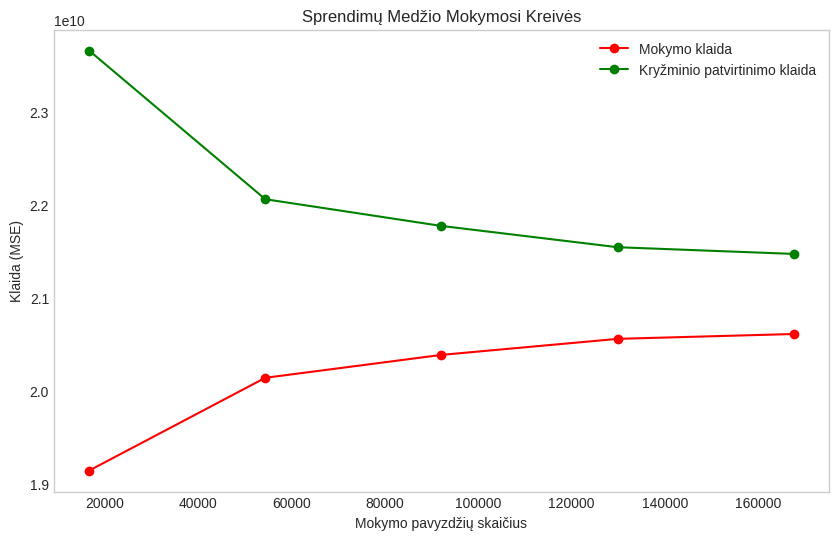


Mokomas Atsitiktinių Miškų Regresorius...

--- Atsitiktinis Miškas ---
MAE: 102848.82
MSE: 20231284260.05
R2: 0.5293


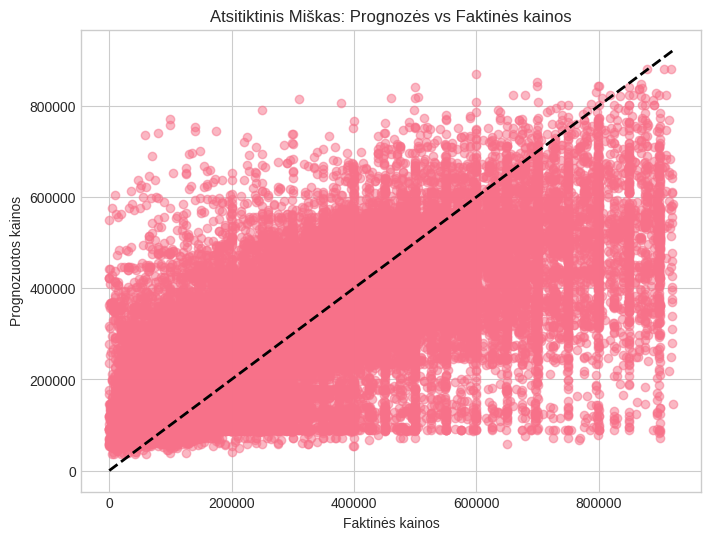

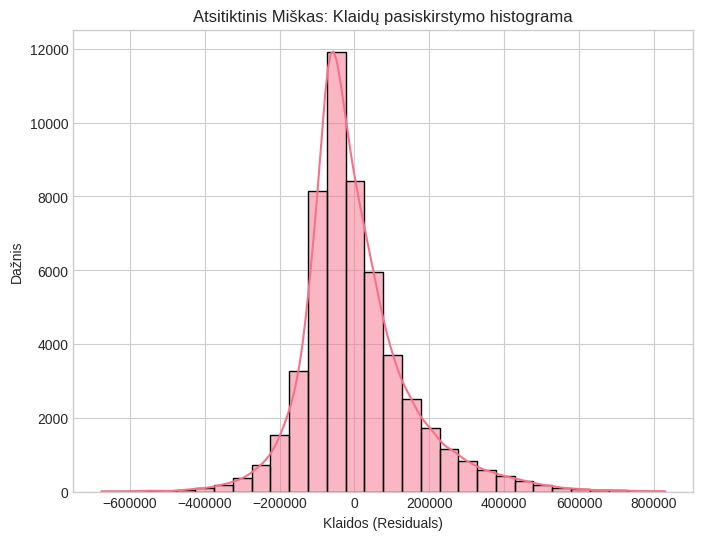

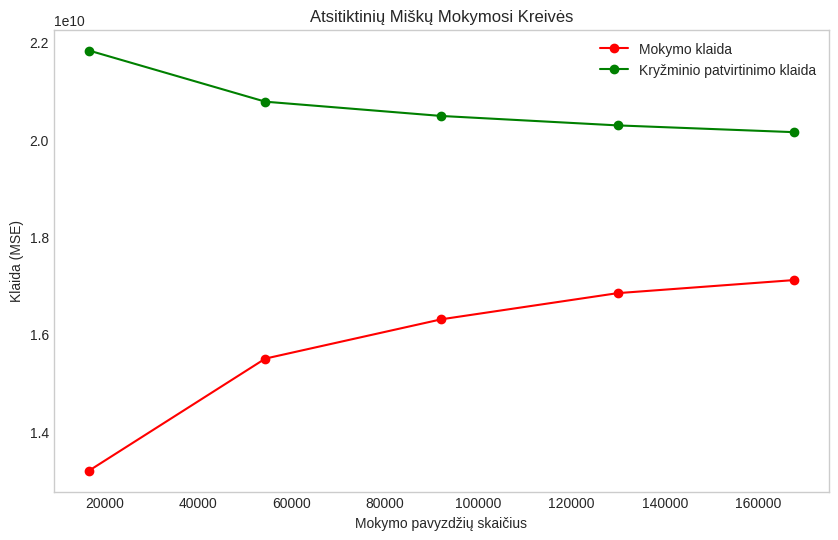


Mokomas Rekurentinis Neuroninis Tinklas (LSTM)...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 64)          │        25,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,561 (150.63 KB)

 Trainable params: 38,561 (150.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5889/5889 ━━━━━━━━━━━━━━━━━━━━ 47s 7ms/step - loss: 63910195200.0000 - mae: 189407.9531 - val_loss: 27331491840.0000 - val_mae: 127916.3906
Epoch 2/50
5889/5889 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 28526974976.0000 - mae: 130668.4219 - val_loss: 25807302656.0000 - val_mae: 122993.0000
Epoch 3/50
5889/5889 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - loss: 27300413440.0000 - mae: 126760.8125 - val_loss: 24787406848.0000 - val_mae: 119473.3438
Epoch 4/50
5889/5889 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - loss: 26397130752.0000 - mae: 123838.0625 - val_loss: 24115499008.0000 - val_mae: 116727.9297
Epoch 5/50
5889/5889 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 25835331584.0000 - mae: 121766.1172 - val_loss: 23528736768.0000 - val_mae: 114978.0625
Epoch 6/50
5889/5889 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - loss: 25194881024.0000 - mae: 119583.9609 - val_loss: 23047700480.0000 - val_mae: 114062.5781
Epoch 7/50
5889/5889 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - loss: 24724942848.0000 - mae: 118097.

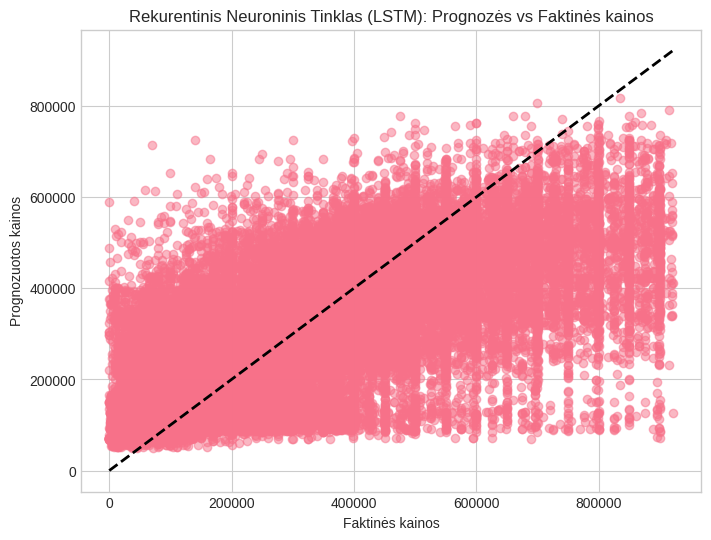

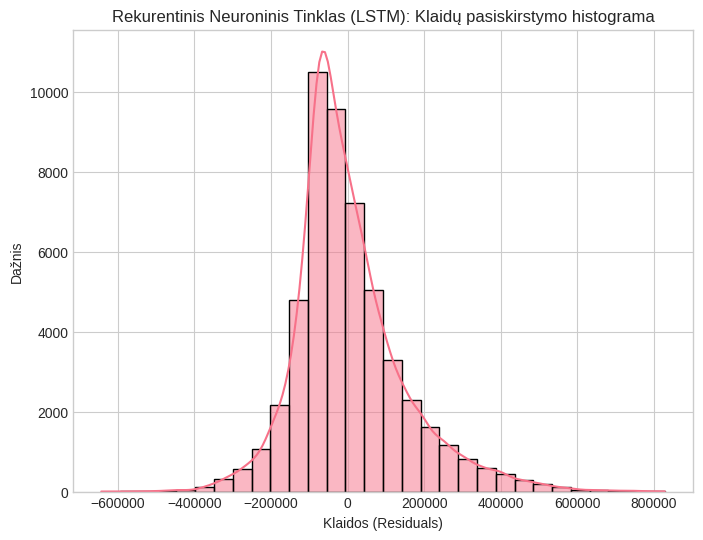

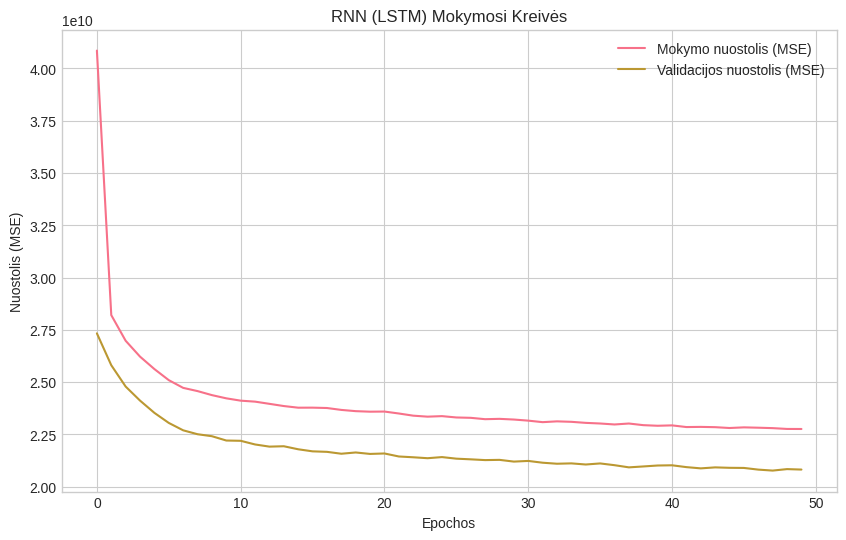


--- Modelių palyginimo lentelė ---
                                                  MAE                 MSE  \
Atsitiktinis Miškas                     102848.822626  20231284260.054726   
Rekurentinis Neuroninis Tinklas (LSTM)  106103.218331  20985426736.557117   
Sprendimų Medis                         107555.606562  21591644157.112526   
Polinominė Regresija (laipsnis 2)       125793.773538  26403975173.060616   
Tiesinė Regresija                        131920.03761  28568722656.106281   

                                              R2  
Atsitiktinis Miškas                     0.529286  
Rekurentinis Neuroninis Tinklas (LSTM)   0.51174  
Sprendimų Medis                         0.497635  
Polinominė Regresija (laipsnis 2)       0.385668  
Tiesinė Regresija                       0.335302  


In [ ]:
# Patikriname ar liko pakankamai duomenų
if len(df_processed) < 50: # Minimalus eilučių skaičius modeliavimui
    print("KLAIDA: Nepakankamas duomenų kiekis modeliavimui po pirminio apdorojimo. Bandykite sušvelninti apdorojimo žingsnius.")
    exit()

# Atskiriame požymius (X) ir tikslinį kintamąjį (y)
X = df_processed.drop('price', axis=1)
y = df_processed['price']

# Patikriname, ar X tuščias (jei visi skaitiniai ir kategoriniai požymiai buvo pašalinti)
if X.empty:
    print("KLAIDA: Požymių rinkinys X yra tuščias. Patikrinkite 'numerical_features' ir 'categorical_features' sąrašus.")
    exit()


# 3.1. Duomenų rinkinį padalykite į mokymo ir testavimo rinkinius.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Mokymo rinkinio dydis: {X_train.shape[0]}, Testavimo rinkinio dydis: {X_test.shape[0]}")


# Sukuriame transformatorių skaitiniams ir kategoriniams požymiams
# Skaitiniams: imputacija (jei dar liko NaN po ankstesnių žingsnių) ir standartizacija
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Nors jau imputavom, pipeline'ui gerai turėti
    ('scaler', StandardScaler())
])

# Kategoriniams: imputacija (jei liko) ir OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Nors jau imputavom
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # sparse_output=False, kad RNN lengviau apdorotų
])


# Atnaujiname požymių sąrašus pagal tai, kas liko X_train
# (gali būti, kad kai kurie buvo pašalinti ankstesniuose etapuose)
current_numerical_features = [col for col in numerical_features if col in X_train.columns]
current_categorical_features = [col for col in categorical_features if col in X_train.columns]


# ColumnTransformer pritaikymui
# Tikriname ar sąrašai nėra tušti prieš kuriant ColumnTransformer
transformers_list = []
if current_numerical_features:
    transformers_list.append(('num', numerical_transformer, current_numerical_features))
if current_categorical_features:
    transformers_list.append(('cat', categorical_transformer, current_categorical_features))

if not transformers_list:
    print("KLAIDA: Nėra požymių transformavimui. Patikrinkite 'numerical_features' ir 'categorical_features'.")
    # Jei nėra požymių, modeliavimas negalimas.
    # Galima naudoti X_train tiesiogiai, jei visi požymiai skaitiniai ir jau apdoroti.
    # Bet čia tikėtina, kad kažkas negerai su požymių identifikavimu.
    # Šiam pavyzdžiui, darome prielaidą, kad bent kažkokie požymiai yra.
    # Jei kyla problemų, patikrinkite, ar `numerical_features` ir `categorical_features` teisingai nustatyti
    # ir ar jie nebuvo pašalinti anksčiau.
    # Jei, pvz., liko tik skaitiniai, galima naudoti tik numerical_transformer X_train tiesiogiai.
    # For now, let's assume at least numerical features are present.
    if not current_numerical_features and not current_categorical_features:
        print("Nėra nei skaitinių, nei kategorinių požymių. Modeliavimas negalimas.")
        exit() # Arba kitokia klaidos apdorojimo logika

preprocessor = ColumnTransformer(transformers=transformers_list, remainder='passthrough')


# Funkcija modelio įvertinimui ir rezultatų spausdinimui
results = {}
def evaluate_model(name, model, X_test_transformed, y_test_true):
    predictions = model.predict(X_test_transformed)
    if predictions.ndim > 1 and predictions.shape[1] == 1: # RNN gali grąžinti (n, 1) formos masyvą
        predictions = predictions.flatten()

    mae = mean_absolute_error(y_test_true, predictions)
    mse = mean_squared_error(y_test_true, predictions)
    r2 = r2_score(y_test_true, predictions)

    print(f"\n--- {name} ---")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R2: {r2:.4f}")

    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2, 'predictions': predictions}
    return predictions

# Funkcija grafikams
def plot_predictions_vs_actual(name, y_test_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_true, y_pred, alpha=0.5)
    plt.plot([y_test_true.min(), y_test_true.max()], [y_test_true.min(), y_test_true.max()], 'k--', lw=2)
    plt.xlabel('Faktinės kainos')
    plt.ylabel('Prognozuotos kainos')
    plt.title(f'{name}: Prognozės vs Faktinės kainos')
    plt.show()

def plot_residuals_distribution(name, y_test_true, y_pred):
    residuals = y_test_true - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, bins=30)
    plt.xlabel('Klaidos (Residuals)')
    plt.ylabel('Dažnis')
    plt.title(f'{name}: Klaidų pasiskirstymo histograma')
    plt.show()

def plot_learning_curves(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))
    plt.title(title)
    plt.xlabel("Mokymo pavyzdžių skaičius")
    plt.ylabel("Klaida (MSE)") # Naudosime MSE kaip klaidą

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')

    # Paverčiame į teigiamą MSE
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1) # Nenaudosim std, bet gerai turėti
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1) # Nenaudosim std

    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Mokymo klaida")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Kryžminio patvirtinimo klaida")

    plt.legend(loc="best")
    plt.show()
    return plt

# 3.2. Įgyvendinkite regresijos algoritmus:
# Svarbu: Mokome preprocesorių TIK su mokymo duomenimis (X_train)
# ir tada transformuojame X_train ir X_test
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

# Jei po transformacijos nelieka požymių (pvz., jei buvo tik kategoriniai ir jie visi buvo reti)
if X_train_prepared.shape[1] == 0:
    print("KLAIDA: Po duomenų paruošimo neliko požymių. Patikrinkite preprocesoriaus konfigūraciją ir duomenis.")
    exit()

# ### A. Tiesinė regresija
print("\nMokomas Tiesinės Regresijos modelis...")
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)
lin_reg_pred = evaluate_model('Tiesinė Regresija', lin_reg, X_test_prepared, y_test)
plot_predictions_vs_actual('Tiesinė Regresija', y_test, lin_reg_pred)
plot_residuals_distribution('Tiesinė Regresija', y_test, lin_reg_pred)
plot_learning_curves(LinearRegression(), "Tiesinės Regresijos Mokymosi Kreivės", X_train_prepared, y_train, cv=5)


# ### B. Polinominė regresija
print("\nMokomas Polinominės Regresijos modelis...")
# Sukuriame pipeline su polinominiais požymiais ir tiesine regresija
# Polinomo laipsnis - svarbus hiperparametras. Pradėkime nuo 2.
poly_degree = 2
poly_reg_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=poly_degree, include_bias=False)),
    ("lin_reg", LinearRegression())
])
# Polinominė regresija gali būti jautri požymių masteliui,
# bet mūsų `X_train_prepared` jau yra standartizuotas (skaitiniai požymiai).
poly_reg_pipeline.fit(X_train_prepared, y_train) # Mokome su jau transformuotais duomenimis
poly_reg_pred = evaluate_model(f'Polinominė Regresija (laipsnis {poly_degree})', poly_reg_pipeline, X_test_prepared, y_test)
plot_predictions_vs_actual(f'Polinominė Regresija (laipsnis {poly_degree})', y_test, poly_reg_pred)
plot_residuals_distribution(f'Polinominė Regresija (laipsnis {poly_degree})', y_test, poly_reg_pred)
# Mokymosi kreivėms reikia viso pipeline, įskaitant preprocesorių
full_poly_pipeline_for_learning_curve = Pipeline([
    ('preprocessor', preprocessor),
    ("poly_features", PolynomialFeatures(degree=poly_degree, include_bias=False)),
    ("lin_reg", LinearRegression())
])
# Pastaba: mokymosi kreivėms paduodame neapdorotus X_train, y_train, nes pipeline apima preprocesorių
plot_learning_curves(full_poly_pipeline_for_learning_curve, f"Polinominės Regresijos (laipsnis {poly_degree}) Mokymosi Kreivės", X_train, y_train, cv=5)


# ### C. Sprendimų medžiai
print("\nMokomas Sprendimų Medžio Regresorius...")
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_split=10) # Pridedame hiperparametrus
tree_reg.fit(X_train_prepared, y_train)
tree_reg_pred = evaluate_model('Sprendimų Medis', tree_reg, X_test_prepared, y_test)
plot_predictions_vs_actual('Sprendimų Medis', y_test, tree_reg_pred)
plot_residuals_distribution('Sprendimų Medis', y_test, tree_reg_pred)
full_tree_pipeline_for_learning_curve = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_split=10))
])
plot_learning_curves(full_tree_pipeline_for_learning_curve, "Sprendimų Medžio Mokymosi Kreivės", X_train, y_train, cv=5)


# ### D. Atsitiktiniai miškai
print("\nMokomas Atsitiktinių Miškų Regresorius...")
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=15, min_samples_split=5) # Pridedame hiperparametrus
forest_reg.fit(X_train_prepared, y_train)
forest_reg_pred = evaluate_model('Atsitiktinis Miškas', forest_reg, X_test_prepared, y_test)
plot_predictions_vs_actual('Atsitiktinis Miškas', y_test, forest_reg_pred)
plot_residuals_distribution('Atsitiktinis Miškas', y_test, forest_reg_pred)
full_forest_pipeline_for_learning_curve = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=15, min_samples_split=5)) # Sumažintas n_estimators greitesnėms kreivėms
])
plot_learning_curves(full_forest_pipeline_for_learning_curve, "Atsitiktinių Miškų Mokymosi Kreivės", X_train, y_train, cv=5)


# ### E. Rekurentiniai neuroniniai tinklai (RNN)
# RNN reikalauja 3D įvesties (pavyzdžiai, laiko žingsniai, požymiai).
# Lenteliniams duomenims, kiekvieną eilutę galime traktuoti kaip vieną laiko žingsnį.
print("\nMokomas Rekurentinis Neuroninis Tinklas (LSTM)...")

# Pertvarkome duomenis į RNN tinkamą formatą: (samples, timesteps, features)
# Čia turėsime 1 laiko žingsnį
X_train_rnn = X_train_prepared.reshape((X_train_prepared.shape[0], 1, X_train_prepared.shape[1]))
X_test_rnn = X_test_prepared.reshape((X_test_prepared.shape[0], 1, X_test_prepared.shape[1]))

# Modeliuojame LSTM tinklą
rnn_model = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu', return_sequences=False), # Paskutinis LSTM sluoksnis negrąžina sekos
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1) # Išvesties sluoksnis su vienu neuronu (kainos prognozė)
])

rnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
rnn_model.summary()

# Ankstyvas sustabdymas, kad išvengtume persimokymo
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Treniruojame modelį
# Jei duomenų daug, sumažinkite epochų skaičių arba naudokite mažesnį duomenų rinkinio pavyzdį
history = rnn_model.fit(X_train_rnn, y_train,
                        epochs=50, # Sumažinta epochų sk. greitesniam vykdymui
                        batch_size=32,
                        validation_split=0.1, # Naudojame dalį mokymo duomenų validacijai
                        callbacks=[early_stopping],
                        verbose=1) # verbose=1, kad matytume progresą

# Įvertiname RNN modelį
rnn_pred = evaluate_model('Rekurentinis Neuroninis Tinklas (LSTM)', rnn_model, X_test_rnn, y_test)
plot_predictions_vs_actual('Rekurentinis Neuroninis Tinklas (LSTM)', y_test, rnn_pred)
plot_residuals_distribution('Rekurentinis Neuroninis Tinklas (LSTM)', y_test, rnn_pred)

# RNN mokymosi kreivės (iš history objekto)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Mokymo nuostolis (MSE)')
plt.plot(history.history['val_loss'], label='Validacijos nuostolis (MSE)')
plt.title('RNN (LSTM) Mokymosi Kreivės')
plt.xlabel('Epochos')
plt.ylabel('Nuostolis (MSE)')
plt.legend()
plt.show()

# 3.3. Įvertinkite kiekvieno modelio našumą testavimo rinkinyje, naudodami tokius rodiklius kaip:
# vidutinė absoliuti klaida (MAE), vidutinė kvadratinė klaida (MSE) ir R2 rodiklis.
# Pavaizduokite šių rodiklių rezultatus visiems modeliams bendroje lentelėje palyginimui.

results_df = pd.DataFrame(results).T.drop(columns=['predictions']) # Pašaliname prognozes iš lentelės
print("\n--- Modelių palyginimo lentelė ---")
print(results_df.sort_values(by='R2', ascending=False))